In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from lmfit.models import LorentzianModel, LinearModel



[[Model]]
    (Model(linear, prefix='line_') - Model(lorentzian, prefix='lorentz1_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 332
    # data points      = 301
    # variables        = 5
    chi-square         = 0.00472614
    reduced chi-square = 1.5967e-05
    Akaike info crit   = -3319.58894
    Bayesian info crit = -3301.05339
    R-squared          = 0.94475608
[[Variables]]
    lorentz1_amplitude:  3.37906866 +/- 0.08075796 (2.39%) (init = 5)
    lorentz1_center:     2860.00000 +/- 0.68173451 (0.02%) (init = 2850)
    lorentz1_sigma:      15.9543157 +/- 0.45421337 (2.85%) (init = 10)
    lorentz1_fwhm:       31.9086314 +/- 0.90842673 (2.85%) == '2.0000000*lorentz1_sigma'
    lorentz1_height:     0.06741693 +/- 0.00113280 (1.68%) == '0.3183099*lorentz1_amplitude/max(1e-15, lorentz1_sigma)'
    line_slope:          6.5011e-07 +/- 2.6867e-06 (413.26%) (init = 0)
    line_intercept:      0.98951183 +/- 0.00764073 (0.77%) (init = 1)
[[Correlations]]

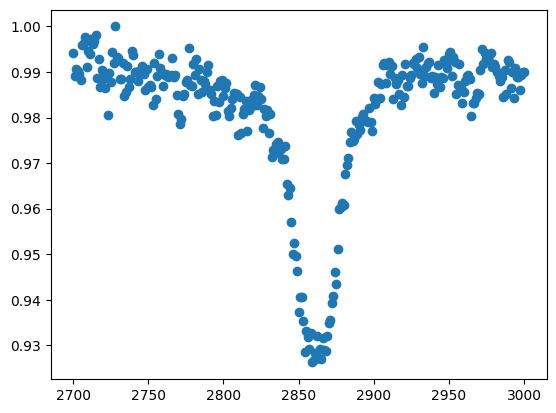

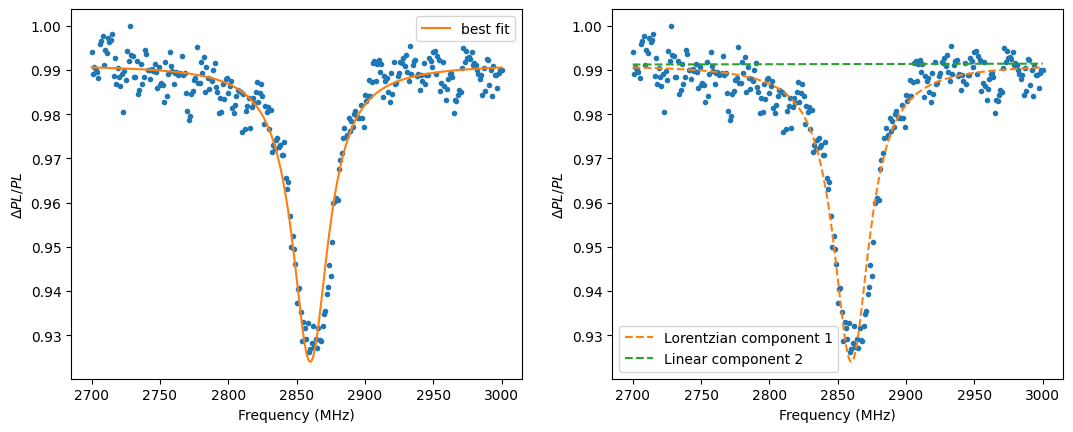

In [70]:
data_folder = r'D:\odmr_data\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW_freqRange2700to3000_1time.csv'
df = pd.read_csv(data_folder, header=0)
x = np.array(df['Frequency'])
y = np.array(df['Intensity'])

y = y/np.max(y)
plt.scatter(x,y)
lorentz1_mod = LorentzianModel(prefix='lorentz1_')
pars = lorentz1_mod.make_params(amplitude=5, center=dict(value = 2850, min=2830, max=2860), sigma=10)

# lorentz2_mod = LorentzianModel(prefix='lorentz2_')
# pars.update(lorentz2_mod .make_params(amplitude=5, center=dict(value = 2870, min=2855, max=2890), sigma=10))
line_mod = LinearModel(prefix='line_')
pars.update(line_mod.make_params(intercept=1, slope=0))
mod = line_mod - lorentz1_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report())

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, '.')
# axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y, '.')
axes[1].plot(x, comps['line_'] - comps['lorentz1_'], '--', label='Lorentzian component 1')
# axes[1].plot(x, comps['line_'] - comps['lorentz2_'], '--', label='Lorentzian component 2')
axes[1].plot(x, comps['line_'], '--', label='Linear component 2')
axes[1].legend()

# 添加轴标签
axes[0].set_xlabel('Frequency (MHz)')
axes[1].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel(r'$\Delta PL/PL$')
axes[1].set_ylabel(r'$\Delta PL/PL$')

plt.show()

[[Model]]
    ((Model(linear, prefix='line_') - Model(lorentzian, prefix='lorentz1_')) - Model(lorentzian, prefix='lorentz2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 146
    # data points      = 301
    # variables        = 8
    chi-square         = 4.8863e-04
    reduced chi-square = 1.6677e-06
    Akaike info crit   = -3996.63627
    Bayesian info crit = -3966.97939
    R-squared          = 0.99433795
[[Variables]]
    lorentz1_amplitude:  2.19981759 +/- 0.10842258 (4.93%) (init = 5)
    lorentz1_center:     2860.00000 +/- 0.55154630 (0.02%) (init = 2850)
    lorentz1_sigma:      12.5797541 +/- 0.28708175 (2.28%) (init = 10)
    lorentz1_fwhm:       25.1595082 +/- 0.57416349 (2.28%) == '2.0000000*lorentz1_sigma'
    lorentz1_height:     0.05566275 +/- 0.00176586 (3.17%) == '0.3183099*lorentz1_amplitude/max(1e-15, lorentz1_sigma)'
    lorentz2_amplitude:  0.70618508 +/- 0.09112691 (12.90%) (init = 5)
    lorentz2_center:     2872.30839 +/- 0.288

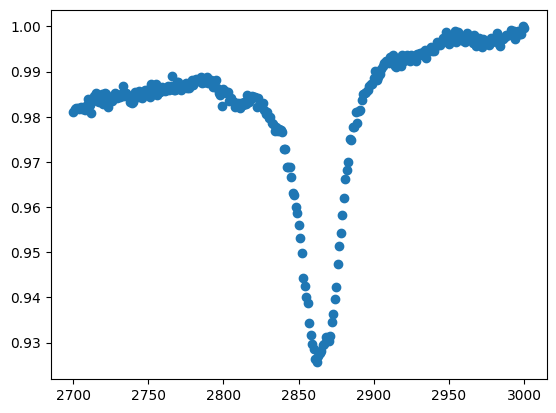

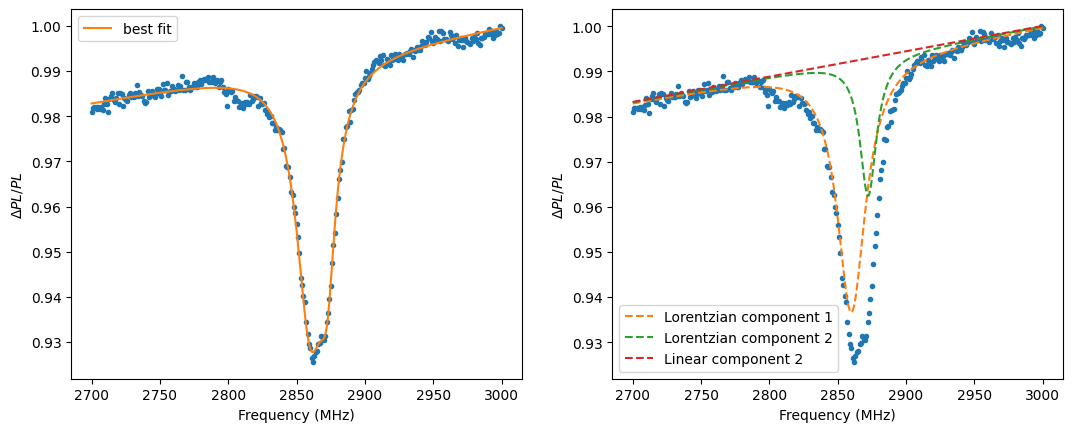

In [71]:
data_folder = r'D:\odmr_data\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW_freqRange2700to3000_10times_repeat.csv'
df = pd.read_csv(data_folder, header=0)
x = np.array(df['Frequency'])
y = np.array(df['Intensity'])

y = y/np.max(y)
plt.scatter(x,y)
lorentz1_mod = LorentzianModel(prefix='lorentz1_')
pars = lorentz1_mod.make_params(amplitude=5, center=dict(value = 2850, min=2830, max=2860), sigma=10)

lorentz2_mod = LorentzianModel(prefix='lorentz2_')
pars.update(lorentz2_mod .make_params(amplitude=5, center=dict(value = 2870, min=2855, max=2890), sigma=10))
line_mod = LinearModel(prefix='line_')
pars.update(line_mod.make_params(intercept=1, slope=0))
mod = line_mod - lorentz1_mod - lorentz2_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report())

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, '.')
# axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y, '.')
axes[1].plot(x, comps['line_'] - comps['lorentz1_'], '--', label='Lorentzian component 1')
axes[1].plot(x, comps['line_'] - comps['lorentz2_'], '--', label='Lorentzian component 2')
axes[1].plot(x, comps['line_'], '--', label='Linear component 2')
axes[1].legend()

# 添加轴标签
axes[0].set_xlabel('Frequency (MHz)')
axes[1].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel(r'$\Delta PL/PL$')
axes[1].set_ylabel(r'$\Delta PL/PL$')

plt.show()

[[Model]]
    ((Model(linear, prefix='line_') - Model(lorentzian, prefix='lorentz1_')) - Model(lorentzian, prefix='lorentz2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 275
    # data points      = 201
    # variables        = 8
    chi-square         = 2.6816e-04
    reduced chi-square = 1.3894e-06
    Akaike info crit   = -2702.97443
    Bayesian info crit = -2676.54799
    R-squared          = 0.99727729
[[Variables]]
    lorentz1_amplitude:  2.66033460 +/- 0.14439788 (5.43%) (init = 5)
    lorentz1_center:     2861.34961 +/- 0.36420270 (0.01%) (init = 2850)
    lorentz1_sigma:      13.9265623 +/- 0.35439508 (2.54%) (init = 10)
    lorentz1_fwhm:       27.8531245 +/- 0.70879016 (2.54%) == '2.0000000*lorentz1_sigma'
    lorentz1_height:     0.06080545 +/- 0.00190850 (3.14%) == '0.3183099*lorentz1_amplitude/max(1e-15, lorentz1_sigma)'
    lorentz2_amplitude:  0.65692371 +/- 0.09622607 (14.65%) (init = 5)
    lorentz2_center:     2873.62548 +/- 0.265

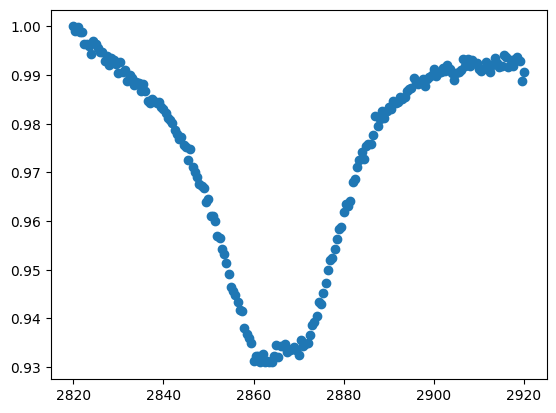

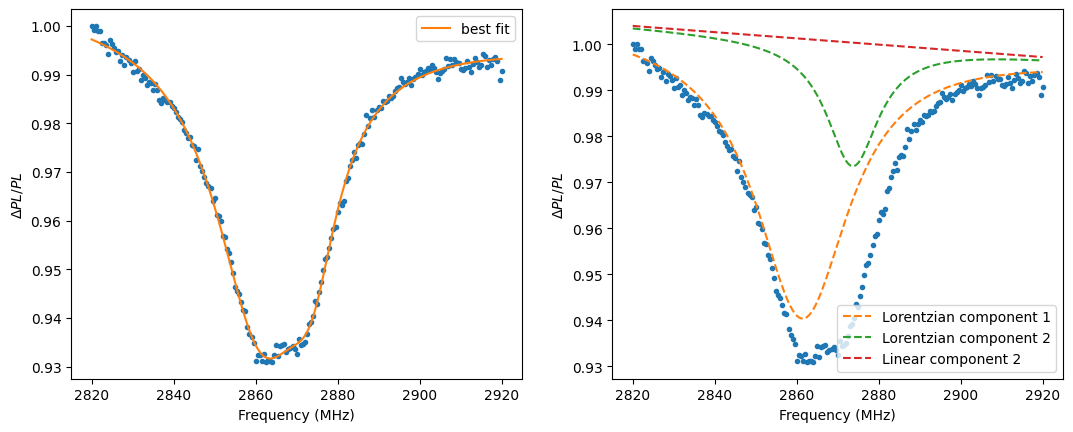

In [73]:
data_folder = r'D:\odmr_data\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW_freqRange2820to2920_step0.5_10times_repeat.csv'
df = pd.read_csv(data_folder, header=0)
x = np.array(df['Frequency'])
y = np.array(df['Intensity'])

y = y/np.max(y)
plt.scatter(x,y)
lorentz1_mod = LorentzianModel(prefix='lorentz1_')
pars = lorentz1_mod.make_params(amplitude=5, center=dict(value = 2850, min=2830, max=2865), sigma=10)

lorentz2_mod = LorentzianModel(prefix='lorentz2_')
pars.update(lorentz2_mod .make_params(amplitude=5, center=dict(value = 2870, min=2855, max=2890), sigma=10))
line_mod = LinearModel(prefix='line_')
pars.update(line_mod.make_params(intercept=1, slope=0))
mod = line_mod - lorentz1_mod - lorentz2_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report())

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, '.')
# axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y, '.')
axes[1].plot(x, comps['line_'] - comps['lorentz1_'], '--', label='Lorentzian component 1')
axes[1].plot(x, comps['line_'] - comps['lorentz2_'], '--', label='Lorentzian component 2')
axes[1].plot(x, comps['line_'], '--', label='Linear component 2')
axes[1].legend()

# 添加轴标签
axes[0].set_xlabel('Frequency (MHz)')
axes[1].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel(r'$\Delta PL/PL$')
axes[1].set_ylabel(r'$\Delta PL/PL$')

plt.show()

[[Model]]
    ((Model(linear, prefix='line_') - Model(lorentzian, prefix='lorentz1_')) - Model(lorentzian, prefix='lorentz2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 181
    # data points      = 301
    # variables        = 8
    chi-square         = 0.00372481
    reduced chi-square = 1.2713e-05
    Akaike info crit   = -3385.25468
    Bayesian info crit = -3355.59780
    R-squared          = 0.89216358
[[Variables]]
    lorentz1_amplitude:  1.08554291 +/- 0.21261811 (19.59%) (init = 5)
    lorentz1_center:     2861.34699 +/- 0.26915195 (0.01%) (init = 2860)
    lorentz1_sigma:      9.12107588 +/- 1.06133433 (11.64%) (init = 10)
    lorentz1_fwhm:       18.2421518 +/- 2.12266866 (11.64%) == '2.0000000*lorentz1_sigma'
    lorentz1_height:     0.03788359 +/- 0.00311940 (8.23%) == '0.3183099*lorentz1_amplitude/max(1e-15, lorentz1_sigma)'
    lorentz2_amplitude:  0.22708504 +/- 0.03942141 (17.36%) (init = 5)
    lorentz2_center:     2871.08498 +/- 0.

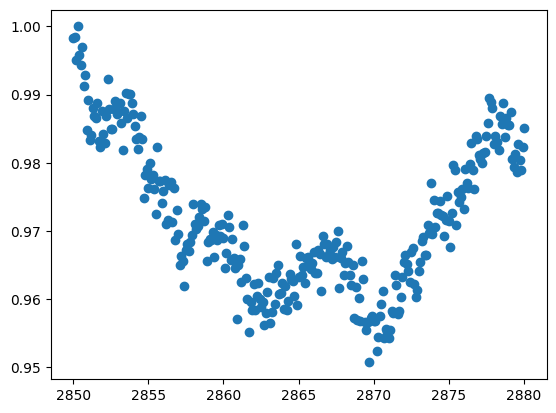

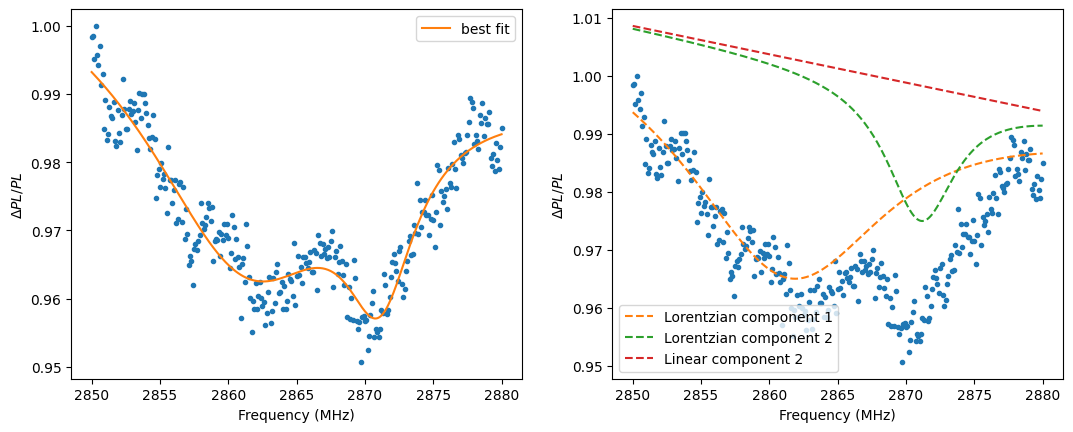

In [78]:
data_folder = r'D:\odmr_data\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW_freqRange2850to2880_step0.1_1time.csv'
df = pd.read_csv(data_folder, header=0)
x = np.array(df['Frequency'])
y = np.array(df['Intensity'])

y = y/np.max(y)
plt.scatter(x,y)
lorentz1_mod = LorentzianModel(prefix='lorentz1_')
pars = lorentz1_mod.make_params(amplitude=5, center=dict(value = 2860, min=2860, max=2865), sigma=10)

lorentz2_mod = LorentzianModel(prefix='lorentz2_')
pars.update(lorentz2_mod .make_params(amplitude=5, center=dict(value = 2870, min=2855, max=2890), sigma=10))
line_mod = LinearModel(prefix='line_')
pars.update(line_mod.make_params(intercept=1, slope=0))
mod = line_mod - lorentz1_mod - lorentz2_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report())

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, '.')
# axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y, '.')
axes[1].plot(x, comps['line_'] - comps['lorentz1_'], '--', label='Lorentzian component 1')
axes[1].plot(x, comps['line_'] - comps['lorentz2_'], '--', label='Lorentzian component 2')
axes[1].plot(x, comps['line_'], '--', label='Linear component 2')
axes[1].legend()

# 添加轴标签
axes[0].set_xlabel('Frequency (MHz)')
axes[1].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel(r'$\Delta PL/PL$')
axes[1].set_ylabel(r'$\Delta PL/PL$')

plt.show()

[[Model]]
    ((Model(linear, prefix='line_') - Model(lorentzian, prefix='lorentz1_')) - Model(lorentzian, prefix='lorentz2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 517
    # data points      = 301
    # variables        = 8
    chi-square         = 4.0479e-04
    reduced chi-square = 1.3815e-06
    Akaike info crit   = -4053.29505
    Bayesian info crit = -4023.63817
    R-squared          = 0.99007957
[[Variables]]
    lorentz1_amplitude:  2.38262764 +/- 0.24200423 (10.16%) (init = 5)
    lorentz1_center:     2861.01923 +/- 0.18568931 (0.01%) (init = 2860)
    lorentz1_sigma:      12.2541523 +/- 0.64808116 (5.29%) (init = 10)
    lorentz1_fwhm:       24.5083045 +/- 1.29616232 (5.29%) == '2.0000000*lorentz1_sigma'
    lorentz1_height:     0.06189037 +/- 0.00304631 (4.92%) == '0.3183099*lorentz1_amplitude/max(1e-15, lorentz1_sigma)'
    lorentz2_amplitude:  0.36374464 +/- 0.05836255 (16.04%) (init = 5)
    lorentz2_center:     2872.33308 +/- 0.11

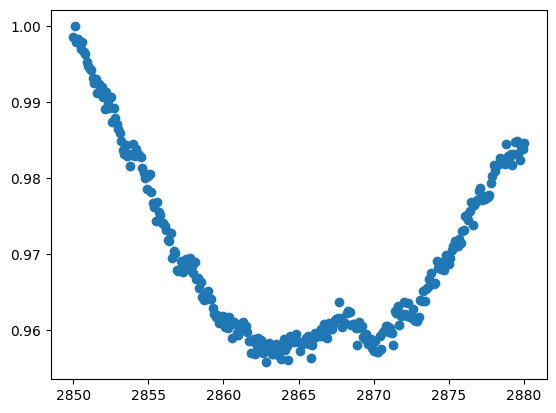

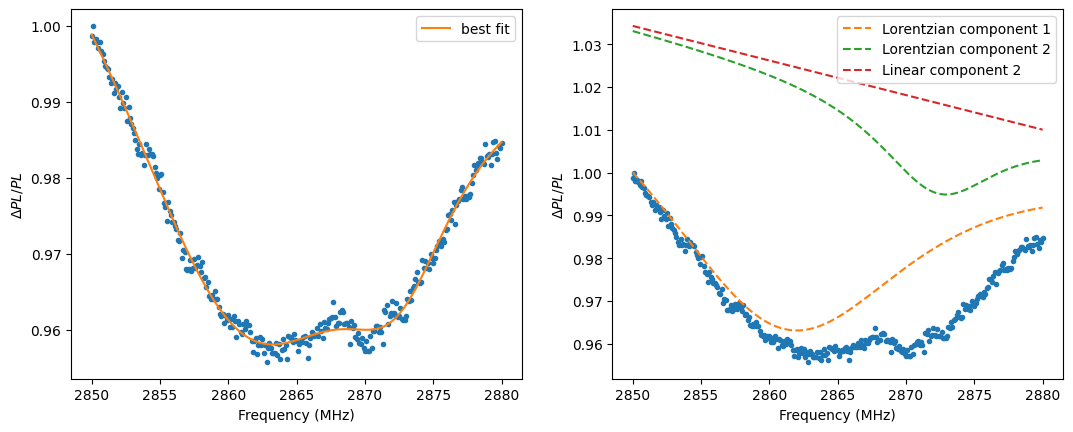

In [87]:
data_folder = r'D:\odmr_data\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW_freqRange2850to2880_step0.1_10times.csv'
df = pd.read_csv(data_folder, header=0)
x = np.array(df['Frequency'])
y = np.array(df['Intensity'])

y = y/np.max(y)
plt.scatter(x,y)
lorentz1_mod = LorentzianModel(prefix='lorentz1_')
pars = lorentz1_mod.make_params(amplitude=5, center=dict(value = 2860, min=2860, max=2865), sigma=10)

lorentz2_mod = LorentzianModel(prefix='lorentz2_')
pars.update(lorentz2_mod .make_params(amplitude=5, center=dict(value = 2870, min=2868, max=2875), sigma=10))
line_mod = LinearModel(prefix='line_')
pars.update(line_mod.make_params(intercept=1, slope=0))
mod = line_mod - lorentz1_mod - lorentz2_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report())

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, '.')
# axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y, '.')
axes[1].plot(x, comps['line_'] - comps['lorentz1_'], '--', label='Lorentzian component 1')
axes[1].plot(x, comps['line_'] - comps['lorentz2_'], '--', label='Lorentzian component 2')
axes[1].plot(x, comps['line_'], '--', label='Linear component 2')
axes[1].legend()

# 添加轴标签
axes[0].set_xlabel('Frequency (MHz)')
axes[1].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel(r'$\Delta PL/PL$')
axes[1].set_ylabel(r'$\Delta PL/PL$')

plt.show()

[[Model]]
    ((Model(linear, prefix='line_') - Model(lorentzian, prefix='lorentz1_')) - Model(lorentzian, prefix='lorentz2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 103
    # data points      = 301
    # variables        = 8
    chi-square         = 0.00317875
    reduced chi-square = 1.0849e-05
    Akaike info crit   = -3432.97131
    Bayesian info crit = -3403.31442
    R-squared          = 0.96304937
[[Variables]]
    lorentz1_amplitude:  1.85247483 +/- 0.10446048 (5.64%) (init = 5)
    lorentz1_center:     2858.06549 +/- 0.35430992 (0.01%) (init = 2860)
    lorentz1_sigma:      10.4531112 +/- 0.51042007 (4.88%) (init = 10)
    lorentz1_fwhm:       20.9062223 +/- 1.02084014 (4.88%) == '2.0000000*lorentz1_sigma'
    lorentz1_height:     0.05641010 +/- 0.00149700 (2.65%) == '0.3183099*lorentz1_amplitude/max(1e-15, lorentz1_sigma)'
    lorentz2_amplitude:  1.08244879 +/- 0.09395276 (8.68%) (init = 5)
    lorentz2_center:     2876.73510 +/- 0.3771

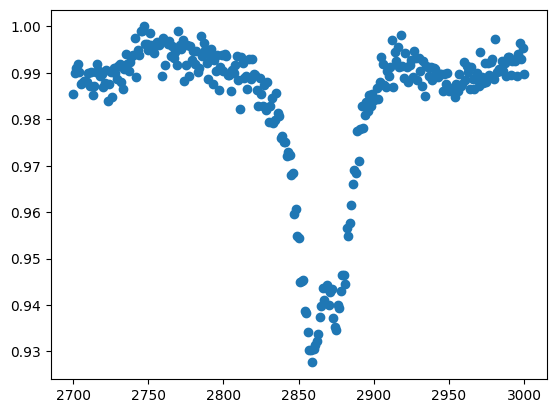

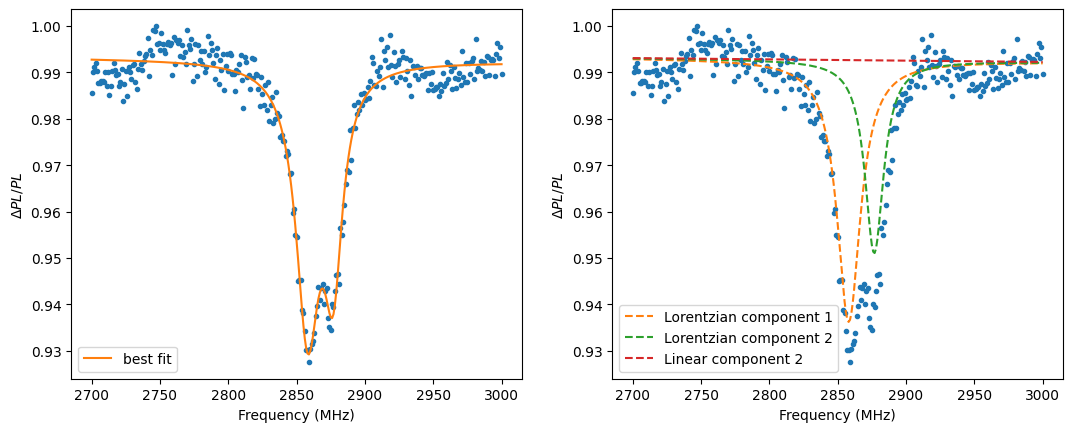

In [89]:
data_folder = r'D:\odmr_data\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW_freqRange2700to3000_withMagnet_1time_0.csv'
df = pd.read_csv(data_folder, header=0)
x = np.array(df['Frequency'])
y = np.array(df['Intensity'])

y = y/np.max(y)
plt.scatter(x,y)
lorentz1_mod = LorentzianModel(prefix='lorentz1_')
pars = lorentz1_mod.make_params(amplitude=5, center=dict(value = 2860, min=2850, max=2870), sigma=10)

lorentz2_mod = LorentzianModel(prefix='lorentz2_')
pars.update(lorentz2_mod .make_params(amplitude=5, center=dict(value = 2870, min=2868, max=2890), sigma=10))
line_mod = LinearModel(prefix='line_')
pars.update(line_mod.make_params(intercept=1, slope=0))
mod = line_mod - lorentz1_mod - lorentz2_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report())

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, '.')
# axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y, '.')
axes[1].plot(x, comps['line_'] - comps['lorentz1_'], '--', label='Lorentzian component 1')
axes[1].plot(x, comps['line_'] - comps['lorentz2_'], '--', label='Lorentzian component 2')
axes[1].plot(x, comps['line_'], '--', label='Linear component 2')
axes[1].legend()

# 添加轴标签
axes[0].set_xlabel('Frequency (MHz)')
axes[1].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel(r'$\Delta PL/PL$')
axes[1].set_ylabel(r'$\Delta PL/PL$')

plt.show()

[[Model]]
    ((Model(linear, prefix='line_') - Model(lorentzian, prefix='lorentz1_')) - Model(lorentzian, prefix='lorentz2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 74
    # data points      = 301
    # variables        = 8
    chi-square         = 0.00368836
    reduced chi-square = 1.2588e-05
    Akaike info crit   = -3388.21509
    Bayesian info crit = -3358.55820
    R-squared          = 0.95525877
[[Variables]]
    lorentz1_amplitude:  1.65468465 +/- 0.09178183 (5.55%) (init = 5)
    lorentz1_center:     2852.15523 +/- 0.37156490 (0.01%) (init = 2850)
    lorentz1_sigma:      11.2243928 +/- 0.61206890 (5.45%) (init = 10)
    lorentz1_fwhm:       22.4487855 +/- 1.22413779 (5.45%) == '2.0000000*lorentz1_sigma'
    lorentz1_height:     0.04692481 +/- 0.00132568 (2.83%) == '0.3183099*lorentz1_amplitude/max(1e-15, lorentz1_sigma)'
    lorentz2_amplitude:  1.63003527 +/- 0.09740211 (5.98%) (init = 5)
    lorentz2_center:     2879.45186 +/- 0.42173

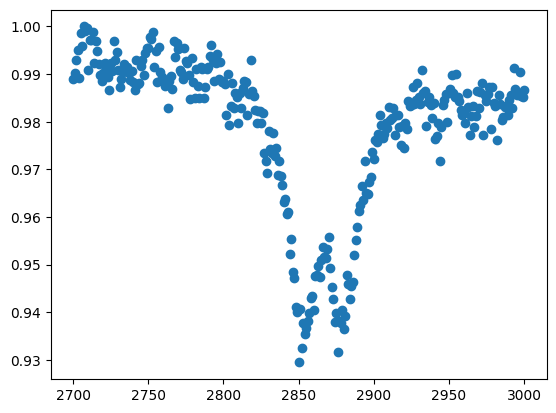

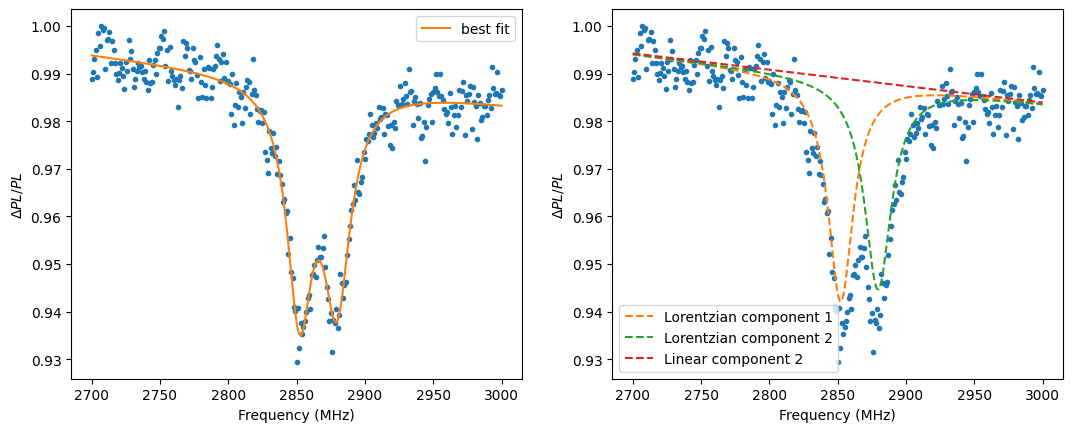

In [68]:
data_folder = r'D:\odmr_data\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW_freqRange2700to3000_withMagnet_1time_1.csv'
df = pd.read_csv(data_folder, header=0)
x = np.array(df['Frequency'])
y = np.array(df['Intensity'])

y = y/np.max(y)
plt.scatter(x,y)
lorentz1_mod = LorentzianModel(prefix='lorentz1_')
pars = lorentz1_mod.make_params(amplitude=5, center=dict(value = 2850, min=2830, max=2860), sigma=10)

lorentz2_mod = LorentzianModel(prefix='lorentz2_')
pars.update(lorentz2_mod .make_params(amplitude=5, center=dict(value = 2870, min=2855, max=2890), sigma=10))
line_mod = LinearModel(prefix='line_')
pars.update(line_mod.make_params(intercept=1, slope=0))
mod = line_mod - lorentz1_mod - lorentz2_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report())

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, '.')
# axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y, '.')
axes[1].plot(x, comps['line_'] - comps['lorentz1_'], '--', label='Lorentzian component 1')
axes[1].plot(x, comps['line_'] - comps['lorentz2_'], '--', label='Lorentzian component 2')
axes[1].plot(x, comps['line_'], '--', label='Linear component 2')
axes[1].legend()

# 添加轴标签
axes[0].set_xlabel('Frequency (MHz)')
axes[1].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel(r'$\Delta PL/PL$')
axes[1].set_ylabel(r'$\Delta PL/PL$')

plt.show()

[[Model]]
    ((Model(linear, prefix='line_') - Model(lorentzian, prefix='lorentz1_')) - Model(lorentzian, prefix='lorentz2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 120
    # data points      = 301
    # variables        = 8
    chi-square         = 0.00536462
    reduced chi-square = 1.8309e-05
    Akaike info crit   = -3275.44709
    Bayesian info crit = -3245.79020
    R-squared          = 0.91385133
[[Variables]]
    lorentz1_amplitude:  1.58679553 +/- 0.08265211 (5.21%) (init = 5)
    lorentz1_center:     2846.34044 +/- 0.43825275 (0.02%) (init = 2850)
    lorentz1_sigma:      12.1546683 +/- 0.74234431 (6.11%) (init = 10)
    lorentz1_fwhm:       24.3093365 +/- 1.48468862 (6.11%) == '2.0000000*lorentz1_sigma'
    lorentz1_height:     0.04155545 +/- 0.00140144 (3.37%) == '0.3183099*lorentz1_amplitude/max(1e-15, lorentz1_sigma)'
    lorentz2_amplitude:  1.56850231 +/- 0.08705774 (5.55%) (init = 5)
    lorentz2_center:     2886.49577 +/- 0.4546

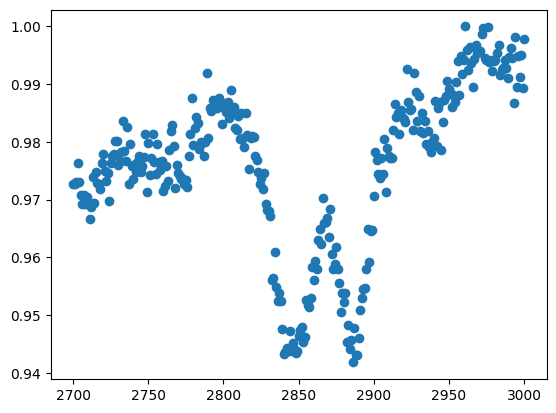

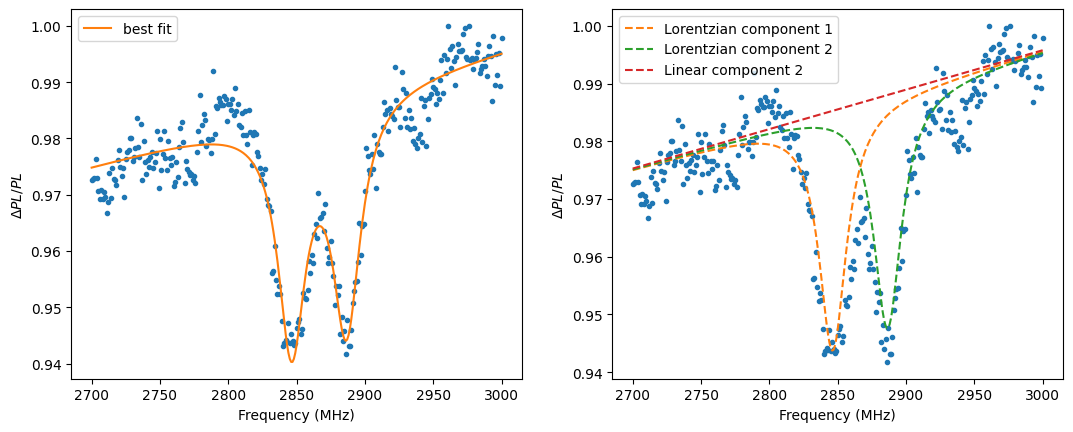

In [90]:
data_folder = r'D:\odmr_data\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW_freqRange2700to3000_withMagnet_1time_2.csv'
df = pd.read_csv(data_folder, header=0)
x = np.array(df['Frequency'])
y = np.array(df['Intensity'])

y = y/np.max(y)
plt.scatter(x,y)
lorentz1_mod = LorentzianModel(prefix='lorentz1_')
pars = lorentz1_mod.make_params(amplitude=5, center=dict(value = 2850, min=2830, max=2860), sigma=10)

lorentz2_mod = LorentzianModel(prefix='lorentz2_')
pars.update(lorentz2_mod .make_params(amplitude=5, center=dict(value = 2870, min=2855, max=2890), sigma=10))
line_mod = LinearModel(prefix='line_')
pars.update(line_mod.make_params(intercept=1, slope=0))
mod = line_mod - lorentz1_mod - lorentz2_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report())

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, '.')
# axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y, '.')
axes[1].plot(x, comps['line_'] - comps['lorentz1_'], '--', label='Lorentzian component 1')
axes[1].plot(x, comps['line_'] - comps['lorentz2_'], '--', label='Lorentzian component 2')
axes[1].plot(x, comps['line_'], '--', label='Linear component 2')
axes[1].legend()

# 添加轴标签
axes[0].set_xlabel('Frequency (MHz)')
axes[1].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel(r'$\Delta PL/PL$')
axes[1].set_ylabel(r'$\Delta PL/PL$')

plt.show()

[[Model]]
    ((Model(linear, prefix='line_') - Model(lorentzian, prefix='lorentz1_')) - Model(lorentzian, prefix='lorentz2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 110
    # data points      = 301
    # variables        = 8
    chi-square         = 0.00352073
    reduced chi-square = 1.2016e-05
    Akaike info crit   = -3402.21524
    Bayesian info crit = -3372.55835
    R-squared          = 0.92846462
[[Variables]]
    lorentz1_amplitude:  2.38295471 +/- 0.10733393 (4.50%) (init = 5)
    lorentz1_center:     2835.28981 +/- 0.57711353 (0.02%) (init = 2850)
    lorentz1_sigma:      21.6112729 +/- 1.05691019 (4.89%) (init = 10)
    lorentz1_fwhm:       43.2225459 +/- 2.11382038 (4.89%) == '2.0000000*lorentz1_sigma'
    lorentz1_height:     0.03509826 +/- 8.6532e-04 (2.47%) == '0.3183099*lorentz1_amplitude/max(1e-15, lorentz1_sigma)'
    lorentz2_amplitude:  2.13013644 +/- 0.11809640 (5.54%) (init = 5)
    lorentz2_center:     2901.45132 +/- 0.6102

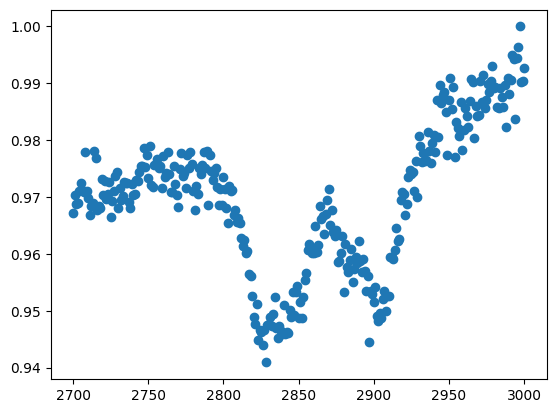

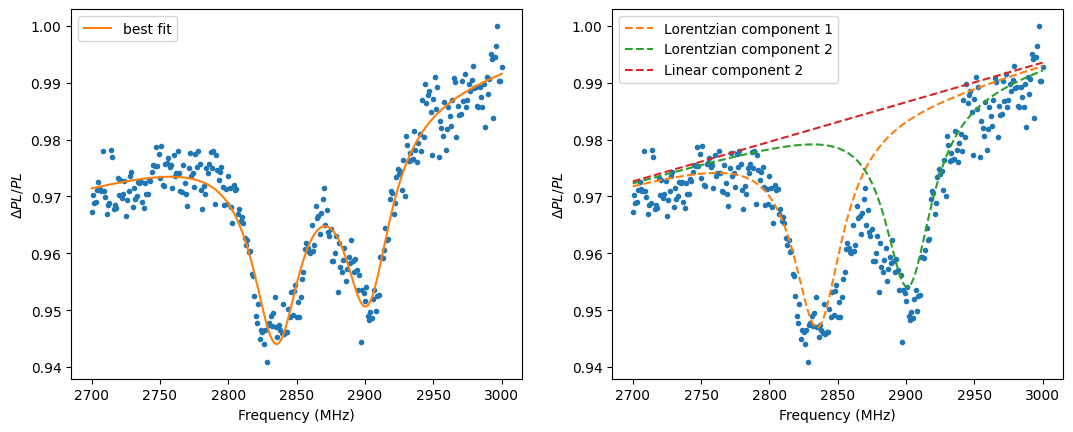

In [95]:
data_folder = r'D:\odmr_data\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW_freqRange2700to3000_withMagnet_1time_3.csv'
df = pd.read_csv(data_folder, header=0)
x = np.array(df['Frequency'])
y = np.array(df['Intensity'])

y = y/np.max(y)
plt.scatter(x,y)
lorentz1_mod = LorentzianModel(prefix='lorentz1_')
pars = lorentz1_mod.make_params(amplitude=5, center=dict(value = 2850, min=2800, max=2860), sigma=10)

lorentz2_mod = LorentzianModel(prefix='lorentz2_')
pars.update(lorentz2_mod .make_params(amplitude=5, center=dict(value = 2870, min=2850, max=2950), sigma=10))
line_mod = LinearModel(prefix='line_')
pars.update(line_mod.make_params(intercept=1, slope=0))
mod = line_mod - lorentz1_mod - lorentz2_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report())

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, '.')
# axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y, '.')
axes[1].plot(x, comps['line_'] - comps['lorentz1_'], '--', label='Lorentzian component 1')
axes[1].plot(x, comps['line_'] - comps['lorentz2_'], '--', label='Lorentzian component 2')
axes[1].plot(x, comps['line_'], '--', label='Linear component 2')
axes[1].legend()

# 添加轴标签
axes[0].set_xlabel('Frequency (MHz)')
axes[1].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel(r'$\Delta PL/PL$')
axes[1].set_ylabel(r'$\Delta PL/PL$')

plt.show()

[[Model]]
    ((Model(linear, prefix='line_') - Model(lorentzian, prefix='lorentz1_')) - Model(lorentzian, prefix='lorentz2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 100
    # data points      = 301
    # variables        = 8
    chi-square         = 0.00324329
    reduced chi-square = 1.1069e-05
    Akaike info crit   = -3426.92156
    Bayesian info crit = -3397.26468
    R-squared          = 0.89876574
[[Variables]]
    lorentz1_amplitude:  2.20603710 +/- 0.15769851 (7.15%) (init = 5)
    lorentz1_center:     2819.21526 +/- 0.98074499 (0.03%) (init = 2850)
    lorentz1_sigma:      28.6771244 +/- 1.97127118 (6.87%) (init = 10)
    lorentz1_fwhm:       57.3542488 +/- 3.94254236 (6.87%) == '2.0000000*lorentz1_sigma'
    lorentz1_height:     0.02448654 +/- 7.6945e-04 (3.14%) == '0.3183099*lorentz1_amplitude/max(1e-15, lorentz1_sigma)'
    lorentz2_amplitude:  3.18471077 +/- 0.24564332 (7.71%) (init = 5)
    lorentz2_center:     2905.65960 +/- 0.9764

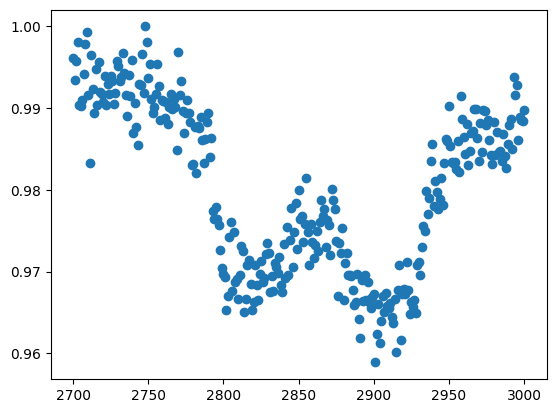

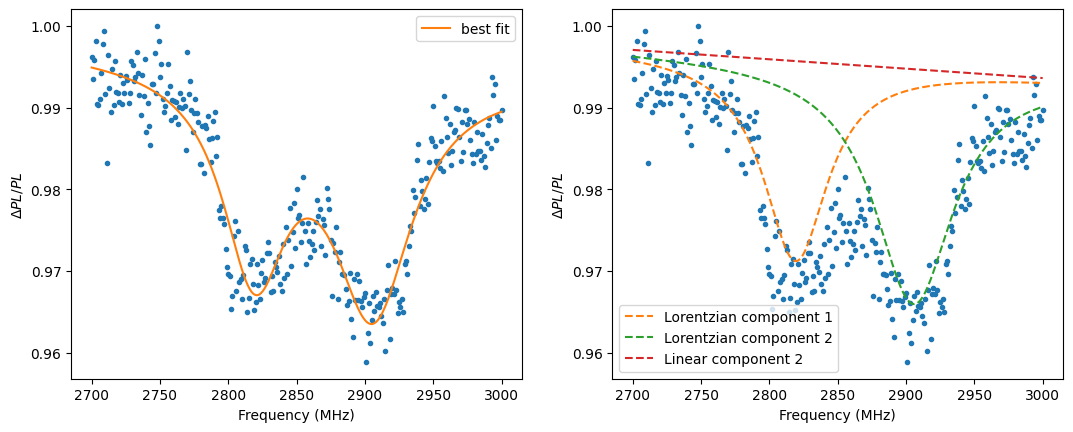

In [94]:
data_folder = r'D:\odmr_data\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW_freqRange2700to3000_withMagnet_1time_4.csv'
df = pd.read_csv(data_folder, header=0)
x = np.array(df['Frequency'])
y = np.array(df['Intensity'])

y = y/np.max(y)
plt.scatter(x,y)
lorentz1_mod = LorentzianModel(prefix='lorentz1_')
pars = lorentz1_mod.make_params(amplitude=5, center=dict(value = 2850, min=2800, max=2860), sigma=10)

lorentz2_mod = LorentzianModel(prefix='lorentz2_')
pars.update(lorentz2_mod .make_params(amplitude=5, center=dict(value = 2870, min=2850, max=2950), sigma=10))
line_mod = LinearModel(prefix='line_')
pars.update(line_mod.make_params(intercept=1, slope=0))
mod = line_mod - lorentz1_mod - lorentz2_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report())

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, '.')
# axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y, '.')
axes[1].plot(x, comps['line_'] - comps['lorentz1_'], '--', label='Lorentzian component 1')
axes[1].plot(x, comps['line_'] - comps['lorentz2_'], '--', label='Lorentzian component 2')
axes[1].plot(x, comps['line_'], '--', label='Linear component 2')
axes[1].legend()

# 添加轴标签
axes[0].set_xlabel('Frequency (MHz)')
axes[1].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel(r'$\Delta PL/PL$')
axes[1].set_ylabel(r'$\Delta PL/PL$')

plt.show()

[[Model]]
    ((Model(linear, prefix='line_') - Model(lorentzian, prefix='lorentz1_')) - Model(lorentzian, prefix='lorentz2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 333
    # data points      = 301
    # variables        = 8
    chi-square         = 0.00456929
    reduced chi-square = 1.5595e-05
    Akaike info crit   = -3323.74766
    Bayesian info crit = -3294.09078
    R-squared          = 0.76004019
[[Variables]]
    lorentz1_amplitude:  17.9215243 +/- 3.72309101 (20.77%) (init = 5)
    lorentz1_center:     2860.00000 +/- 3.24299604 (0.11%) (init = 2850)
    lorentz1_sigma:      112.265940 +/- 31.1613308 (27.76%) (init = 10)
    lorentz1_fwhm:       224.531880 +/- 62.3226616 (27.76%) == '2.0000000*lorentz1_sigma'
    lorentz1_height:     0.05081326 +/- 0.00741335 (14.59%) == '0.3183099*lorentz1_amplitude/max(1e-15, lorentz1_sigma)'
    lorentz2_amplitude: -2.53969751 +/- 2.01489323 (79.34%) (init = 5)
    lorentz2_center:     2863.95751 +/- 1

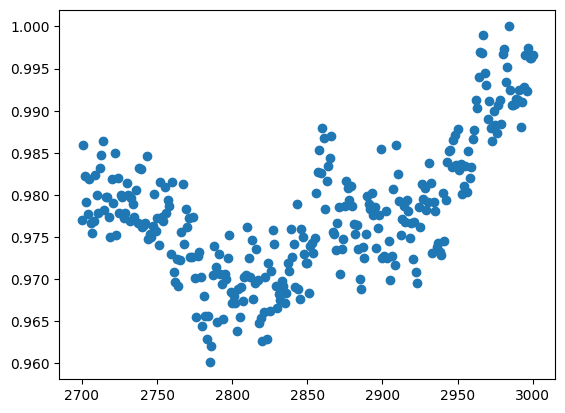

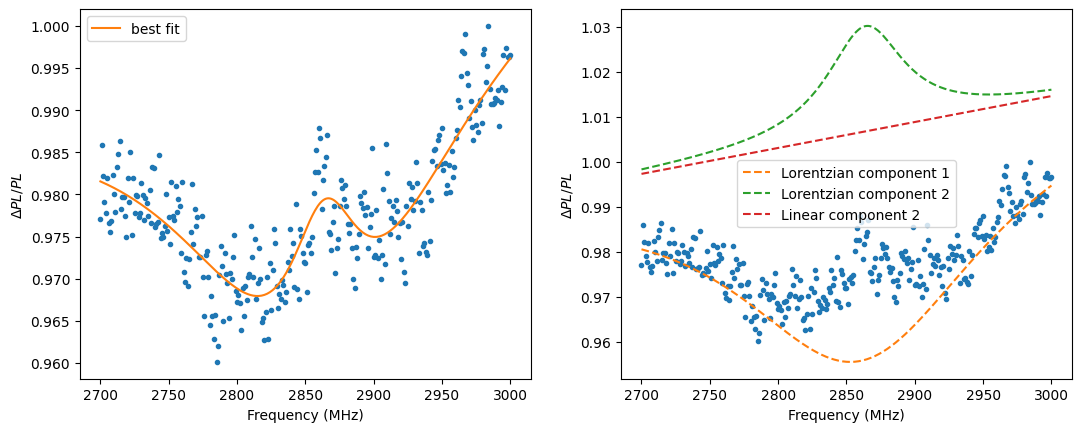

In [96]:
data_folder = r'D:\odmr_data\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW_freqRange2700to3000_withMagnet_1time_5.csv'
df = pd.read_csv(data_folder, header=0)
x = np.array(df['Frequency'])
y = np.array(df['Intensity'])

y = y/np.max(y)
plt.scatter(x,y)
lorentz1_mod = LorentzianModel(prefix='lorentz1_')
pars = lorentz1_mod.make_params(amplitude=5, center=dict(value = 2850, min=2800, max=2860), sigma=10)

lorentz2_mod = LorentzianModel(prefix='lorentz2_')
pars.update(lorentz2_mod .make_params(amplitude=5, center=dict(value = 2870, min=2850, max=2950), sigma=10))
line_mod = LinearModel(prefix='line_')
pars.update(line_mod.make_params(intercept=1, slope=0))
mod = line_mod - lorentz1_mod - lorentz2_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report())

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, '.')
# axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y, '.')
axes[1].plot(x, comps['line_'] - comps['lorentz1_'], '--', label='Lorentzian component 1')
axes[1].plot(x, comps['line_'] - comps['lorentz2_'], '--', label='Lorentzian component 2')
axes[1].plot(x, comps['line_'], '--', label='Linear component 2')
axes[1].legend()

# 添加轴标签
axes[0].set_xlabel('Frequency (MHz)')
axes[1].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel(r'$\Delta PL/PL$')
axes[1].set_ylabel(r'$\Delta PL/PL$')

plt.show()

[[Model]]
    ((Model(linear, prefix='line_') - Model(lorentzian, prefix='lorentz1_')) - Model(lorentzian, prefix='lorentz2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 119
    # data points      = 301
    # variables        = 8
    chi-square         = 0.00153853
    reduced chi-square = 5.2509e-06
    Akaike info crit   = -3651.39631
    Bayesian info crit = -3621.73943
    R-squared          = 0.95938619
[[Variables]]
    lorentz1_amplitude:  2.09722545 +/- 0.06408832 (3.06%) (init = 5)
    lorentz1_center:     2833.87586 +/- 0.37612946 (0.01%) (init = 2850)
    lorentz1_sigma:      19.9778435 +/- 0.67950049 (3.40%) (init = 10)
    lorentz1_fwhm:       39.9556871 +/- 1.35900098 (3.40%) == '2.0000000*lorentz1_sigma'
    lorentz1_height:     0.03341540 +/- 5.9131e-04 (1.77%) == '0.3183099*lorentz1_amplitude/max(1e-15, lorentz1_sigma)'
    lorentz2_amplitude:  1.75125349 +/- 0.06830647 (3.90%) (init = 5)
    lorentz2_center:     2898.69055 +/- 0.4202

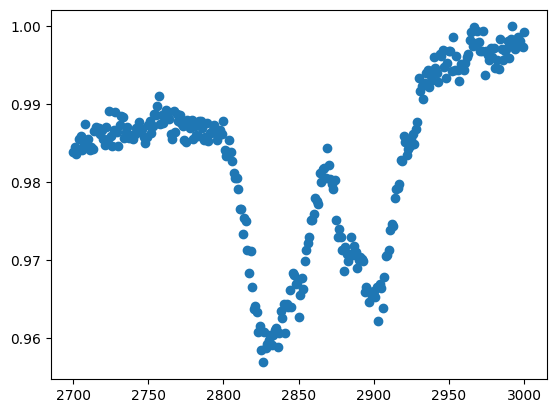

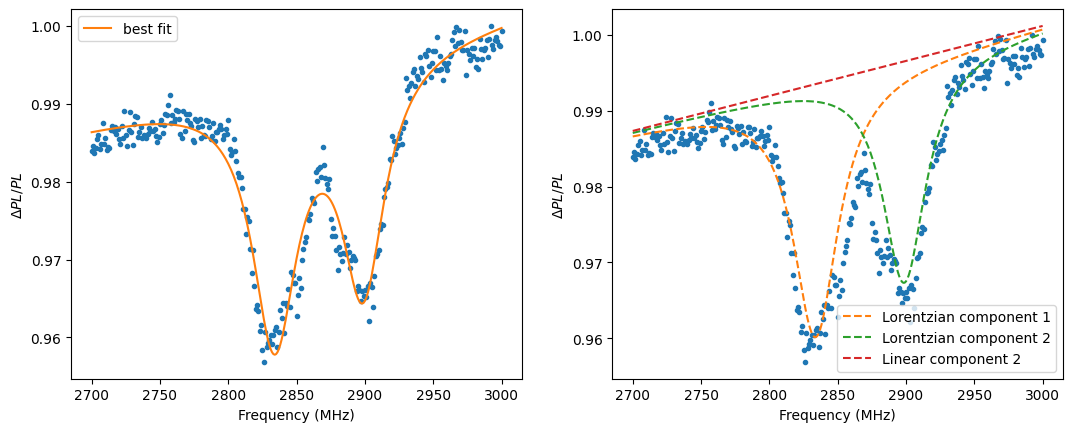

In [97]:
data_folder = r'D:\odmr_data\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW_freqRange2700to3000_withMagnet_5times_3.csv'
df = pd.read_csv(data_folder, header=0)
x = np.array(df['Frequency'])
y = np.array(df['Intensity'])

y = y/np.max(y)
plt.scatter(x,y)
lorentz1_mod = LorentzianModel(prefix='lorentz1_')
pars = lorentz1_mod.make_params(amplitude=5, center=dict(value = 2850, min=2800, max=2860), sigma=10)

lorentz2_mod = LorentzianModel(prefix='lorentz2_')
pars.update(lorentz2_mod .make_params(amplitude=5, center=dict(value = 2870, min=2850, max=2950), sigma=10))
line_mod = LinearModel(prefix='line_')
pars.update(line_mod.make_params(intercept=1, slope=0))
mod = line_mod - lorentz1_mod - lorentz2_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report())

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, '.')
# axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y, '.')
axes[1].plot(x, comps['line_'] - comps['lorentz1_'], '--', label='Lorentzian component 1')
axes[1].plot(x, comps['line_'] - comps['lorentz2_'], '--', label='Lorentzian component 2')
axes[1].plot(x, comps['line_'], '--', label='Linear component 2')
axes[1].legend()

# 添加轴标签
axes[0].set_xlabel('Frequency (MHz)')
axes[1].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel(r'$\Delta PL/PL$')
axes[1].set_ylabel(r'$\Delta PL/PL$')

plt.show()

[[Model]]
    ((Model(linear, prefix='line_') - Model(lorentzian, prefix='lorentz1_')) - Model(lorentzian, prefix='lorentz2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 127
    # data points      = 301
    # variables        = 8
    chi-square         = 0.00127423
    reduced chi-square = 4.3489e-06
    Akaike info crit   = -3708.12963
    Bayesian info crit = -3678.47275
    R-squared          = 0.94525131
[[Variables]]
    lorentz1_amplitude:  2.55149395 +/- 0.11163991 (4.38%) (init = 5)
    lorentz1_center:     2821.26441 +/- 0.64017689 (0.02%) (init = 2850)
    lorentz1_sigma:      31.9580701 +/- 1.31868475 (4.13%) (init = 10)
    lorentz1_fwhm:       63.9161402 +/- 2.63736949 (4.13%) == '2.0000000*lorentz1_sigma'
    lorentz1_height:     0.02541348 +/- 4.6751e-04 (1.84%) == '0.3183099*lorentz1_amplitude/max(1e-15, lorentz1_sigma)'
    lorentz2_amplitude:  2.49558189 +/- 0.14978817 (6.00%) (init = 5)
    lorentz2_center:     2909.18655 +/- 0.7268

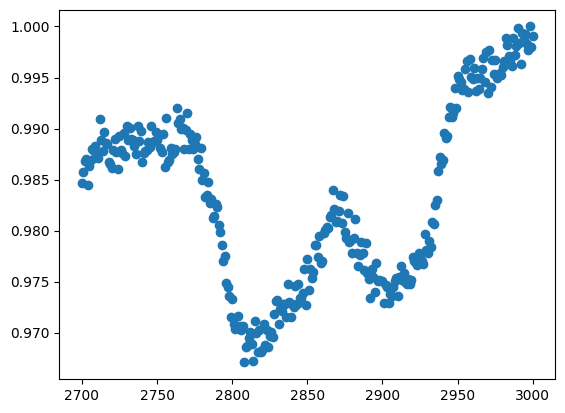

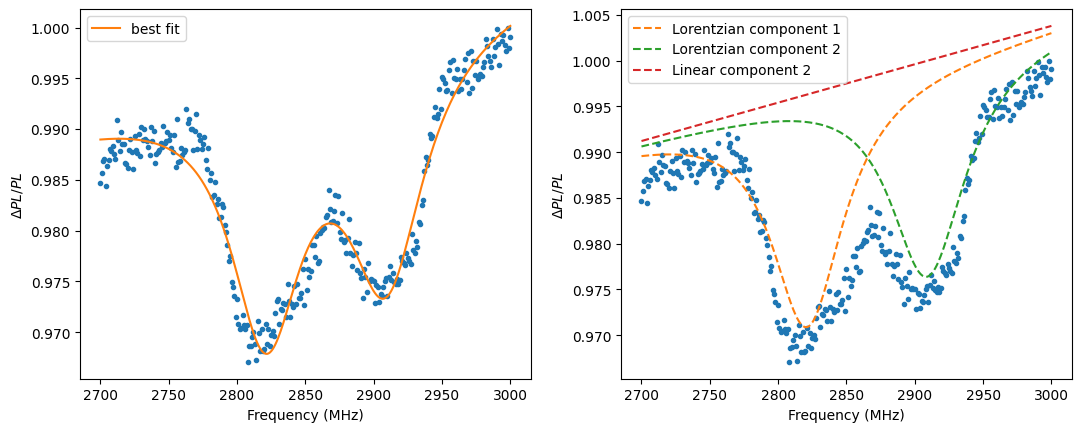

In [98]:
data_folder = r'D:\odmr_data\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW_freqRange2700to3000_withMagnet_5times_4.csv'
df = pd.read_csv(data_folder, header=0)
x = np.array(df['Frequency'])
y = np.array(df['Intensity'])

y = y/np.max(y)
plt.scatter(x,y)
lorentz1_mod = LorentzianModel(prefix='lorentz1_')
pars = lorentz1_mod.make_params(amplitude=5, center=dict(value = 2850, min=2800, max=2860), sigma=10)

lorentz2_mod = LorentzianModel(prefix='lorentz2_')
pars.update(lorentz2_mod .make_params(amplitude=5, center=dict(value = 2870, min=2850, max=2950), sigma=10))
line_mod = LinearModel(prefix='line_')
pars.update(line_mod.make_params(intercept=1, slope=0))
mod = line_mod - lorentz1_mod - lorentz2_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report())

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, '.')
# axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y, '.')
axes[1].plot(x, comps['line_'] - comps['lorentz1_'], '--', label='Lorentzian component 1')
axes[1].plot(x, comps['line_'] - comps['lorentz2_'], '--', label='Lorentzian component 2')
axes[1].plot(x, comps['line_'], '--', label='Linear component 2')
axes[1].legend()

# 添加轴标签
axes[0].set_xlabel('Frequency (MHz)')
axes[1].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel(r'$\Delta PL/PL$')
axes[1].set_ylabel(r'$\Delta PL/PL$')

plt.show()

[[Model]]
    ((Model(linear, prefix='line_') - Model(lorentzian, prefix='lorentz1_')) - Model(lorentzian, prefix='lorentz2_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 202
    # data points      = 301
    # variables        = 8
    chi-square         = 0.00131851
    reduced chi-square = 4.5000e-06
    Akaike info crit   = -3697.84844
    Bayesian info crit = -3668.19156
    R-squared          = 0.91941173
[[Variables]]
    lorentz1_amplitude:  2.84113776 +/- 0.24593773 (8.66%) (init = 5)
    lorentz1_center:     2806.12167 +/- 1.23453779 (0.04%) (init = 2850)
    lorentz1_sigma:      48.4618993 +/- 3.19198486 (6.59%) (init = 10)
    lorentz1_fwhm:       96.9237986 +/- 6.38396972 (6.59%) == '2.0000000*lorentz1_sigma'
    lorentz1_height:     0.01866130 +/- 6.4063e-04 (3.43%) == '0.3183099*lorentz1_amplitude/max(1e-15, lorentz1_sigma)'
    lorentz2_amplitude:  3.11951010 +/- 0.49170055 (15.76%) (init = 5)
    lorentz2_center:     2929.42717 +/- 1.554

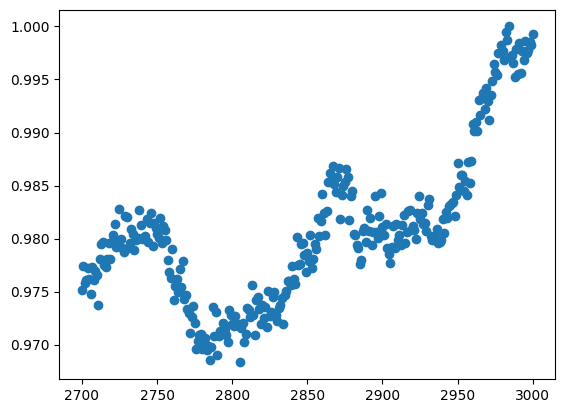

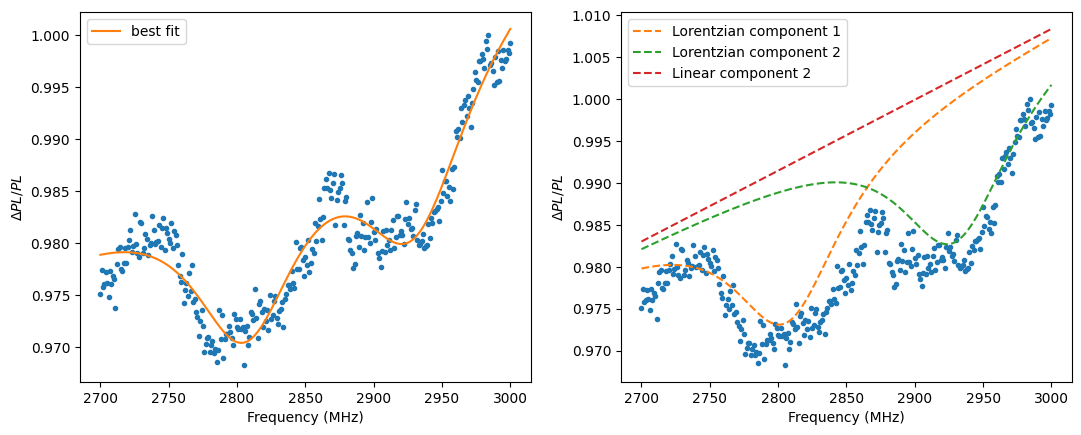

In [99]:
data_folder = r'D:\odmr_data\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW\20231024_cw_odmr_NVcenter_ensemble_mw_power_45dbm_532pump_2mW_freqRange2700to3000_withMagnet_5times_5.csv'
df = pd.read_csv(data_folder, header=0)
x = np.array(df['Frequency'])
y = np.array(df['Intensity'])

y = y/np.max(y)
plt.scatter(x,y)
lorentz1_mod = LorentzianModel(prefix='lorentz1_')
pars = lorentz1_mod.make_params(amplitude=5, center=dict(value = 2850, min=2800, max=2860), sigma=10)

lorentz2_mod = LorentzianModel(prefix='lorentz2_')
pars.update(lorentz2_mod .make_params(amplitude=5, center=dict(value = 2870, min=2850, max=2950), sigma=10))
line_mod = LinearModel(prefix='line_')
pars.update(line_mod.make_params(intercept=1, slope=0))
mod = line_mod - lorentz1_mod - lorentz2_mod

init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report())

fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, '.')
# axes[0].plot(x, init, '--', label='initial fit')
axes[0].plot(x, out.best_fit, '-', label='best fit')
axes[0].legend()

comps = out.eval_components(x=x)
axes[1].plot(x, y, '.')
axes[1].plot(x, comps['line_'] - comps['lorentz1_'], '--', label='Lorentzian component 1')
axes[1].plot(x, comps['line_'] - comps['lorentz2_'], '--', label='Lorentzian component 2')
axes[1].plot(x, comps['line_'], '--', label='Linear component 2')
axes[1].legend()

# 添加轴标签
axes[0].set_xlabel('Frequency (MHz)')
axes[1].set_xlabel('Frequency (MHz)')
axes[0].set_ylabel(r'$\Delta PL/PL$')
axes[1].set_ylabel(r'$\Delta PL/PL$')

plt.show()